In [1]:
from __future__ import print_function, division
import pylab as pl
import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# TIME SERIES ANALYSIS

## Goal: Find outliers, trends and periodicity in the MTA turnstyle data

### Data:
MTA subway fares. It is a complete dataset of rides logged by card swipes for 600 Manhattan stations.
The data was organized by Sina Kashuk at CUSP.

It contains 23 different subway card types (e.g. monthly pass, daily pass, Act for Disability pass…) as follows:

![Ridetypes](Ridetypes.png)

### Task:
Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

### Data processing

In [5]:
#Load MTA dataarray
mta = np.load('MTA_Fare.npy')
print ("MTA array shape:", mta.shape)
print ("MTA array shape summed over all ride types:", np.nansum(mta,axis=1).shape)

MTA array shape: (600, 23, 194)
MTA array shape summed over all ride types: (600, 194)


In [7]:
#Set -1 as nan. Need to change array to float first
mta = mta.astype(float)
mta[mta==-1] = np.nan

In [8]:
#Collapse data into stations, suming across card types
mta_by_station = np.nansum(mta, axis=1)
mta_by_station.shape

(600, 194)

In [9]:
#Calculate the power spectrum and get the number of periods
#Here I used 3 years of data instead of the whole range, to get periods of exactly 52 weeks
N = 3*52
power_spectrum = (np.fft.rfft(mta_by_station, n=N).real)**2

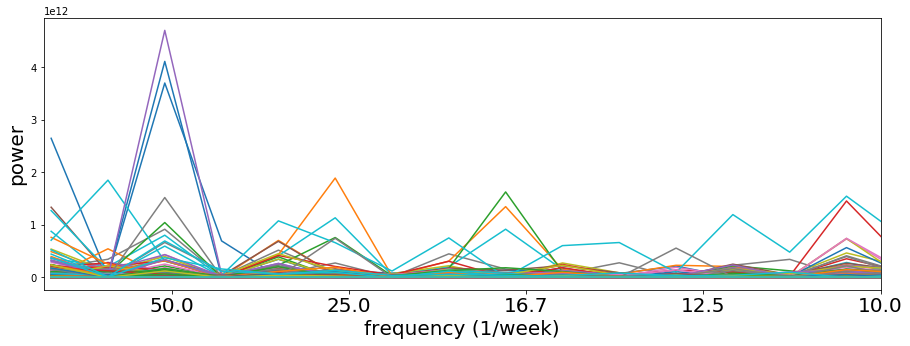

In [39]:
#Plot the power spectrum for all stations
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.set_xlim(1/180,1.0/10)

for i in range(len(power_spectrum)):
    #ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (power_spectrum[3][1:]), 'o', ms=10)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (power_spectrum[i][1:]), '-')

ax.set_xticklabels([ "{:.1f}".format(1/f) for f in ax.get_xticks()], fontsize=20)
pl.ylabel("power", fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20);

**Figure 1: Power spectrum for station's swipes time series over frequency in weeks.** This is the power spectrum from the Fourier Transform of each station's time series. We can see that a number of stations have a high periodicity at 52 weeks (yearly).

### Let's find the stations that have the most prominent periodicity at 52 weeks

In [38]:
#Create a mask to select the position of 52 in the power spectrum array
index_52w = (1/np.fft.rfftfreq(N, 1.0)) == 52

#Sort the power spectrum array using only the column for 52 weeks
#Added - to sort in descending order
find = np.argsort(-power_spectrum[:,index_52w].reshape((600,)))

#This are the 4 stations with the most prominent periodiity
for station in find[:4]:
    print('Station {} with power {:.2E} at 52 weeks'.format(station, power_spectrum[station,index_52w][0]))

Station 194 with power 4.71E+12 at 52 weeks
Station 150 with power 4.12E+12 at 52 weeks
Station 0 with power 3.70E+12 at 52 weeks
Station 327 with power 1.52E+12 at 52 weeks


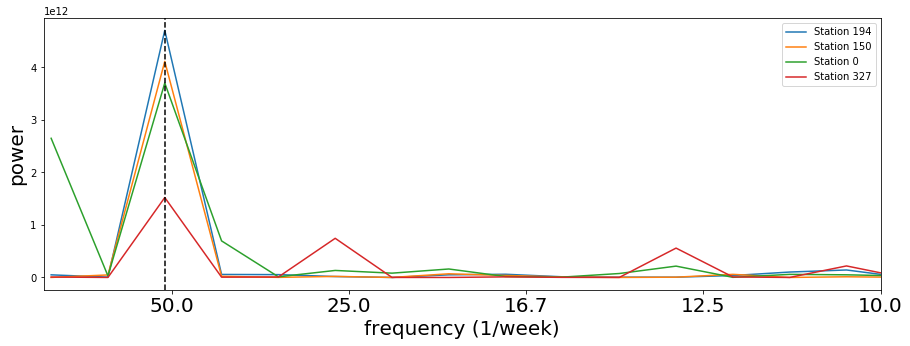

In [40]:
# Plot the power spectrum for this stations
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.set_xlim(1/180,1.0/10)

for i in find[:4]:
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (power_spectrum[i][1:]), '-', label='Station {}'.format(i))

ax.set_xticklabels([ "{:.1f}".format(1/f) for f in ax.get_xticks()], fontsize=20)
ax.legend()
ax.axvline(x=1/52, color='k', ls='--')
pl.ylabel("power", fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20);

**Figure 2: Power spectrum for station's swipes time series over frequency in weeks.** This is the same graph as before, but only showing the four stations that have the most prominent periodicity at 52 weeks.